# SYSC4906 Introduction to Machine Learning
## Assignment 2
|**Student name** | **Student number**|
|-----------------|-------------------|
| Rohan Katkar | 101005880 |


## Step 1: Load the image dataset


In [52]:
from glob import glob

# Load data from SYSC4906 GitHub repo:
!wget https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment2/SYSC4906_Assig2_Data.zip?raw=true
!unzip SYSC4906_Assig2_Data.zip?raw=true

# Get list of filenames for the four datasets:
TRAIN_DIR = 'train'
TEST_DIR = 'test'
trump_train = glob('train/trump/*.jpeg')
trump_test = glob('test/trump/*.jpeg')
decoy_train = glob('train/decoy/*.jpeg')
decoy_test = glob('test/decoy/*.jpeg')

--2019-11-17 15:23:28--  https://github.com/jrgreen7/SYSC4906/blob/master/Assignments/Assignment2/SYSC4906_Assig2_Data.zip?raw=true
Resolving github.com (github.com)... 140.82.118.4
Connecting to github.com (github.com)|140.82.118.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/jrgreen7/SYSC4906/raw/master/Assignments/Assignment2/SYSC4906_Assig2_Data.zip [following]
--2019-11-17 15:23:28--  https://github.com/jrgreen7/SYSC4906/raw/master/Assignments/Assignment2/SYSC4906_Assig2_Data.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jrgreen7/SYSC4906/master/Assignments/Assignment2/SYSC4906_Assig2_Data.zip [following]
--2019-11-17 15:23:29--  https://raw.githubusercontent.com/jrgreen7/SYSC4906/master/Assignments/Assignment2/SYSC4906_Assig2_Data.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133,

## Deliverable 1: Display the first image in each of the four sets

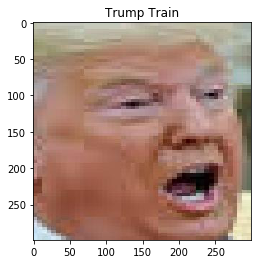

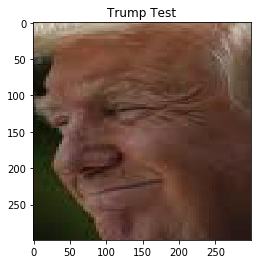

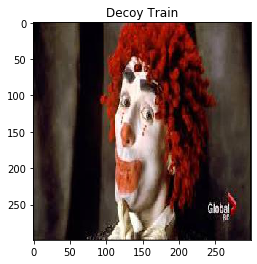

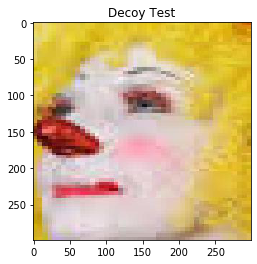

In [53]:
import matplotlib.pyplot as plt
import numpy as np
from numpy import expand_dims
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import ImageDataGenerator  



def prepareTrumpTrain():
  img = load_img(trump_train[0])
  plt.figure()
  plt.title("Trump Train")
  plt.imshow(img)

def prepareTrumpTest():
  img = load_img(trump_test[0]) 
  plt.figure()
  plt.title("Trump Test")
  plt.imshow(img)

def prepareDecoyTrain():
 
  img = load_img(decoy_train[0])
  plt.figure()
  plt.title("Decoy Train")
  plt.imshow(img)
  
def prepareDecoyTest():

  img = load_img(decoy_test[0])
  plt.figure()
  plt.title("Decoy Test")
  plt.imshow(img)
  

prepareTrumpTrain()
prepareTrumpTest()
prepareDecoyTrain()
prepareDecoyTest()
      

##Step 2: Load the original ImageNet-trained Inception v3



In [54]:
from keras.applications.inception_v3 import InceptionV3

base_model = InceptionV3(weights='imagenet')

base_model.summary()

# Number of learnable parameters for Conv2D_1 = 864

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, 299, 299, 3)  0                                            
__________________________________________________________________________________________________
conv2d_565 (Conv2D)             (None, 149, 149, 32) 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_565 (BatchN (None, 149, 149, 32) 96          conv2d_565[0][0]                 
__________________________________________________________________________________________________
activation_565 (Activation)     (None, 149, 149, 32) 0           batch_normalization_565[0][0]    
_______________________________________________________________________________________

**Deliverable 2: Number of parameters in layer 'conv2d_1 (Conv2D)'**

The conv2d_1 (Conv2D) layer has 864 parameters



In [55]:
from keras.preprocessing import image
from keras.applications.inception_v3 import InceptionV3
from keras.applications.imagenet_utils import preprocess_input, decode_predictions
import numpy as np
from keras.preprocessing import image as kp_image



WIDTH = 299
HEIGHT = 299

def predictImgNet(model, img):
    """Run model prediction on an image and decode predictions into 1000 ImageNet classes
    Args:
        model: keras model
        img: PIL format image
    Returns:
        list of predicted labels and their probabilities 
    """
    x = kp_image.img_to_array(img)  # Convert image to nparray
    x = np.expand_dims(x, axis=0)   # Need to pre-pend a dimension to indicate batch number.
    x = preprocess_input(x)         # Normalize image to match how Inceptionv3 expects to receive images
    preds = model.predict(x)        # Use the model to compute prediction score for each possible class
    labels = decode_predictions(preds) # Decodes the output classes back to the original labels for the 1000 ImageNet classes
    return labels[0]


# Clasify 'train/trump/100.jpeg'

im = kp_image.load_img('train/trump/100.jpeg', target_size=(WIDTH , HEIGHT))
print (predictImgNet(base_model, im))
# Classify 'test/decoy/28.jpeg'
im2 = kp_image.load_img('test/decoy/28.jpeg' , target_size=(WIDTH , HEIGHT))
print (predictImgNet(base_model, im2))



[('n06359193', 'web_site', 1.0), ('n03047690', 'clog', 7.980908e-24), ('n04328186', 'stopwatch', 9.524784e-25), ('n03481172', 'hammer', 1.6472196e-29), ('n02879718', 'bow', 1.0307084e-31)]
[('n03908714', 'pencil_sharpener', 0.8776561), ('n03950228', 'pitcher', 0.12230074), ('n01924916', 'flatworm', 4.255342e-05), ('n06359193', 'web_site', 5.452718e-07), ('n04522168', 'vase', 9.780133e-09)]


**Deliverable 3: What are the top-ranked predictions and their scores from the InceptionV3 original model for these two images?**

The top ranked prediction for train/trump/100.jpeg is web site.
The top ranked prediction for test/decoy/28.jpeg is pencil sharpener.


In [56]:

from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout
from keras.applications.inception_v3 import InceptionV3, preprocess_input

CLASSES = 2

base_model = InceptionV3(weights='imagenet' , include_top = False)
x = base_model.output
x = GlobalAveragePooling2D (name = 'avg_pool')(x)
x = Dropout (0.5)(x)
predictions  = Dense (CLASSES , activation='softmax')(x)
model = Model(inputs = base_model.input , outputs = predictions)

for layer in base_model.layers: ## Freeze the weights of all layers from the base model, except GlobalAveragePooling2D and dense layer
  layer.trainable = False

model.compile (optimizer = 'adam', loss = 'categorical_crossentropy', metrics =['accuracy'])
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_8 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_659 (Conv2D)             (None, None, None, 3 864         input_8[0][0]                    
__________________________________________________________________________________________________
batch_normalization_659 (BatchN (None, None, None, 3 96          conv2d_659[0][0]                 
__________________________________________________________________________________________________
activation_659 (Activation)     (None, None, None, 3 0           batch_normalization_659[0][0]    
____________________________________________________________________________________________

**Deliverable 4: Examine the layers in the full model (see Step 2) and the new modified model using summary(). Which layer has the largest difference in the number of learnable parameters, when comparing the two models? What type of layer is it and why did the number of learnable parameters change?**

The dense layer changes the most. It is reduced from 2049000 down to 4098 because there are only 2 classes (trump, not_trump) the number of
inputs into the layer decreases in comparision to InceptionV3 which detects multiple objects in an image having more a lot more classes, 
leading to more inputs into the layer.

**Step 5: Create training and validation image generators to augment image sets**

In [57]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.inception_v3 import preprocess_input


WIDTH = 299
HEIGHT = 299
BATCH_SIZE = 32

# data prep
train_datagen = ImageDataGenerator(
                preprocessing_function = preprocess_input, #normalization
                featurewise_std_normalization=True,
                width_shift_range = 0.3,
                height_shift_range =0.3,
                horizontal_flip = True,
                fill_mode = 'nearest')

validation_datagen = ImageDataGenerator(
                preprocessing_function = preprocess_input, # normalization
                featurewise_std_normalization=True,
                width_shift_range = 0.3,
                height_shift_range =0.3,
                horizontal_flip = True,
                fill_mode = 'nearest')

train_generator = train_datagen.flow_from_directory(
                                TRAIN_DIR,
                                batch_size = BATCH_SIZE , 
                                class_mode = 'categorical',
                                target_size = (WIDTH, HEIGHT))

validation_generator = validation_datagen.flow_from_directory(
                                TEST_DIR,
                                batch_size = BATCH_SIZE , 
                                class_mode = 'categorical',
                                target_size = (WIDTH, HEIGHT),
                                )

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:348: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, which overrides setting of `featurewise_center`.
  warnings.warn('This ImageDataGenerator specifies '


Found 200 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


**Deliverable 5: Invoke “next” on your training ImageDataGenerator to create a batch of 32 images and labels (where each label is a tuple). Create a 4rowx8col subplot matrix showing all 32 images. Each image should be titled with its label tuple.**

/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1150: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RG

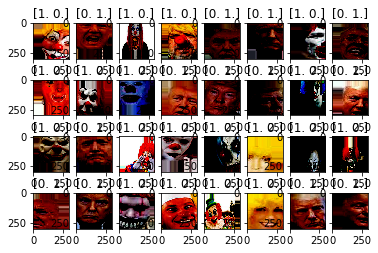

In [58]:
img = train_generator.next()

for i in range(BATCH_SIZE):
  plt.subplot(4,8,i+1)
  plt.title(img[1][i])
  plt.imshow(img[0][i])

**Step 6: Use transfer learning to train the new CNN**


In [59]:
EPOCHS = 10
BATCH_SIZE = 32
STEPS_PER_EPOCH = 3
VALIDATION_STEPS = 1



MODEL_FILE = 'Assignment2.model'

history = model.fit_generator(train_generator,
                              epochs = EPOCHS,
                              steps_per_epoch=STEPS_PER_EPOCH,
                              validation_data=validation_generator,
                              validation_steps=VALIDATION_STEPS)
                        
model.save(MODEL_FILE)

Epoch 1/10


/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:716: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '
/usr/local/lib/python3.6/dist-packages/keras_preprocessing/image/image_data_generator.py:724: UserWarning: This ImageDataGenerator specifies `featurewise_std_normalization`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn('This ImageDataGenerator specifies '


3/3 [==============================] - 27s 9s/step - loss: 0.8848 - acc: 0.4080 - val_loss: 0.5912 - val_acc: 0.6875
Epoch 2/10
3/3 [==============================] - 1s 434ms/step - loss: 0.7394 - acc: 0.5104 - val_loss: 0.5590 - val_acc: 0.6875
Epoch 3/10
3/3 [==============================] - 2s 684ms/step - loss: 0.7350 - acc: 0.5208 - val_loss: 0.5341 - val_acc: 0.6875
Epoch 4/10
3/3 [==============================] - 3s 911ms/step - loss: 0.6288 - acc: 0.6363 - val_loss: 0.5287 - val_acc: 0.6875
Epoch 5/10
3/3 [==============================] - 3s 922ms/step - loss: 0.6087 - acc: 0.6250 - val_loss: 0.4404 - val_acc: 0.8125
Epoch 6/10
3/3 [==============================] - 2s 785ms/step - loss: 0.5373 - acc: 0.7396 - val_loss: 0.4692 - val_acc: 0.7500
Epoch 7/10
3/3 [==============================] - 3s 918ms/step - loss: 0.5302 - acc: 0.7161 - val_loss: 0.4543 - val_acc: 0.8438
Epoch 8/10
3/3 [==============================] - 3s 887ms/step - loss: 0.4743 - acc: 0.7292 - val_loss

**Deliverable 6: Plot the training and validation loss at each training epoch (i.e. the learning curve). Repeat for accuracy instead of loss.**


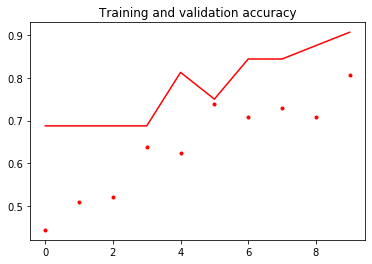

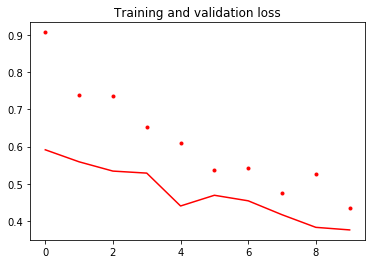

In [60]:
def plot_training(history):
  acc = history.history['acc']
  val_acc = history.history['val_acc']
  loss = history.history['loss']
  val_loss = history.history['val_loss']
  epochs = range(len(acc))
  
  plt.plot(epochs, acc, 'r.')
  plt.plot(epochs, val_acc, 'r')
  plt.title('Training and validation accuracy')
  
  plt.figure()
  plt.plot(epochs, loss, 'r.')
  plt.plot(epochs, val_loss, 'r-')
  plt.title('Training and validation loss')
  plt.show()
  
plot_training(history)

**Step 7: Test the new CNN**


In [0]:
from keras.models import load_model

model = load_model(MODEL_FILE)

In [62]:
from keras.applications.inception_v3 import decode_predictions, preprocess_input
import numpy as np
from keras.preprocessing import image as kp_image

HEIGHT = 299
WIDTH = 299

def predictTrump(model, img):
    """Run model prediction on an image and decode predictions into 1000 ImageNet classes
    Args:
        model: keras model
        img: PIL format image
    Returns:
        Class label with higher predicted probabilities 
    """
    x = kp_image.img_to_array(img)  # Convert image to nparray
    x = np.expand_dims(x, axis=0)   # Need to pre-pend a dimension to indicate batch number.
    x = preprocess_input(x)         # Normalize image to match how Inceptionv3 expects to receive images
    preds = model.predict(x)        # Use the model to compute prediction score for each possible class
    label = 'trump' if preds[0][1]>preds[0][0] else 'decoy' # Decodes the predicted class scores to assign a single class label
    return label

# Example code showing how to predict a single image label:
img = kp_image.load_img('test/decoy/28.jpeg', target_size=(HEIGHT, WIDTH))
label = predictTrump(model, img)
print (label)


decoy


**Deliverable 7: Print confusion matrix and accuracy:**


Accuracy:
0.9


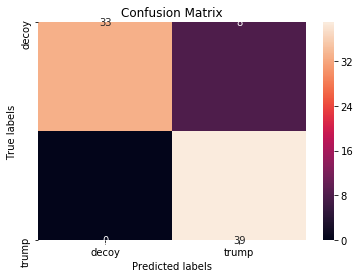

In [63]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt     

# Function to pretty-print confusion matrix. Doesn't work perfectly...
def printCM(cm,labels):
  ax= plt.subplot()
  sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

  # labels, title and ticks
  ax.set_xlabel('Predicted labels')
  ax.set_ylabel('True labels'); 
  ax.set_title('Confusion Matrix') 
  ax.xaxis.set_ticklabels(labels)
  ax.yaxis.set_ticklabels(labels)
  return

test_predictions = []
decoy_predictions =[]
y_true=[]


labels = ['decoy', 'trump']

for tt in trump_test:
  img = kp_image.load_img(tt,target_size=(HEIGHT, WIDTH))
  test_predictions.append(predictTrump(model,img))
  y_true.append('trump')
for dt in decoy_test:
  img = kp_image.load_img(dt,target_size=(HEIGHT, WIDTH))
  decoy_predictions.append(predictTrump(model,img))
  y_true.append('decoy')

test_predictions += decoy_predictions

cm = confusion_matrix(y_true , test_predictions ,labels)
print ("Accuracy:") 
print(accuracy_score(y_true, test_predictions))
printCM(cm, labels)



In [64]:
test_predictions

['trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'trump',
 'decoy',
 'trump',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'trump',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'trump',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'trump',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'trump',
 'trump',
 'decoy',
 'trump',
 'decoy',
 'decoy',
 'trump',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'decoy']

In [65]:
decoy_predictions

['decoy',
 'trump',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'trump',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'trump',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'trump',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'trump',
 'trump',
 'decoy',
 'trump',
 'decoy',
 'decoy',
 'trump',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'decoy',
 'decoy']